### Applying Artificial Neural networks for Credit card fraud detecion

- Neural networks has been applied on the unbalanced dataset.
- I have removed the least relevant features from X based on the chi square test
- we will be predicting the class (fraud || legit transaction)
- Sequential neural network has been implemneted

## Lifecycle followed:
- Loading the data (credit card dataset)
- Check missing values
- Split the data into X and Y (train:80% || test: 20%)
- Create ANN model [ ]
- Compilation step
- Train the model with 15 epochs
- Prediction
- Evaluation

In [13]:
from warnings import filterwarnings
filterwarnings("ignore")

Reading the dataset

In [14]:
import pandas as pd
A=pd.read_csv("C:/Users/Arnav/Desktop/PROJECTS/Credit card fraud detection (IBM)/dataset/creditcard.csv")

Missing Value Treatment

In [3]:
A.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Dividing the training and testing set

In [4]:
X= A.drop(labels=['Class','V22','V23','V25'],axis=1)
Y=A[['Class']]
#full model - model with all the predictors

### Implementing ANN on unbalanced dataset

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=21)

Creating a neural network model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

nn = Sequential()
nn.add(Dense(2000,input_dim=(27)))#Layer 1- input
nn.add(Dense(2000,activation="relu"))#Layer 2
nn.add(Dropout(0.2))#Hidden layer-1
nn.add(Dense(2000,activation="relu"))#Layer 3
nn.add(Dropout(0.3))#Hidden layer-2
nn.add(Dense(1,activation="sigmoid"))#Layer 4 

nn.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=15)

Epoch 1/15
7121/7121 [==============================] - 320s 45ms/step - loss: 41.1228 - accuracy: 0.9963 - val_loss: 0.0256 - val_accuracy: 0.9983
Epoch 2/15
7121/7121 [==============================] - 338s 47ms/step - loss: 0.4895 - accuracy: 0.9981 - val_loss: 0.0152 - val_accuracy: 0.9983
Epoch 3/15
7121/7121 [==============================] - 377s 53ms/step - loss: 54.5007 - accuracy: 0.9979 - val_loss: 0.0167 - val_accuracy: 0.9983
Epoch 4/15
7121/7121 [==============================] - 369s 52ms/step - loss: 12.6654 - accuracy: 0.9981 - val_loss: 0.1207 - val_accuracy: 0.9983
Epoch 5/15
7121/7121 [==============================] - 384s 54ms/step - loss: 15.4075 - accuracy: 0.9981 - val_loss: 13.7651 - val_accuracy: 0.9983
Epoch 6/15
7121/7121 [==============================] - 378s 53ms/step - loss: 2.1762 - accuracy: 0.9979 - val_loss: 0.0491 - val_accuracy: 0.9983
Epoch 7/15
7121/7121 [==============================] - 396s 56ms/step - loss: 2.6396 - accuracy: 0.9981 - val_lo

Model Evaluation

In [7]:
acc = model.history["accuracy"]
valacc = model.history["val_accuracy"]

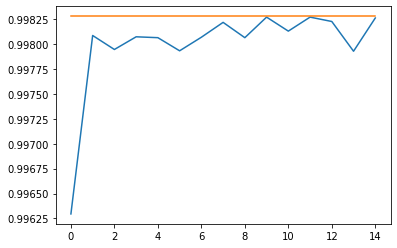

In [8]:
import matplotlib.pyplot as plt
plt.plot(acc)
plt.plot(valacc)

In [9]:
tr_pred = []
for i in nn.predict(xtrain):
    if(i>0.5):
        tr_pred.append(1)
    else:
        tr_pred.append(0)

ts_pred = []
for i in nn.predict(xtest):
    if(i>0.5):
        ts_pred.append(1)
    else:
        ts_pred.append(0)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print("Training accuracy",tr_acc)
print("Testing accuracy",ts_acc)

Training accuracy 0.9982707542408216
Testing accuracy 0.9982795547909132


### generalization error: 0.0000088005500916

# Conclusion:
- the genralization error (testing accuracy - training accuracy) is approx 0.0
- as we have applied ANN on unbalanced dataset, the legit transaction will dominate the outcome of the fraudulent transactions
- epoch 13 gives the best accuracy

## =========================================================================

### Implementing ANN on balanced dataset (Random Under Sampling)

In [15]:
import pandas as pd

In [16]:
from warnings import filterwarnings
filterwarnings("ignore")

In [17]:
A=pd.read_csv("C:/Users/Arnav/Desktop/PROJECTS/Credit card fraud detection (IBM)/new_set_RUS.csv")

In [18]:
A.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,75455,-0.832757,0.723793,1.556898,-1.304189,0.564000,-0.313753,0.928103,0.033233,-0.765745,...,0.059830,0.232433,-0.378386,0.128009,0.503589,1.027027,-0.068378,0.022133,10.30,0
1,66232,-0.717556,-1.219500,1.501383,-0.740817,-0.454398,0.741112,-0.057708,0.123678,-1.180033,...,-0.007957,0.145085,0.387026,-0.812068,-0.641005,1.212390,-0.126944,-0.079157,201.49,0
2,156955,1.805328,-0.708830,-0.705567,0.027614,0.326711,1.903074,-0.968763,0.611733,0.915924,...,0.320173,1.160286,0.170006,-0.652197,-0.405122,0.679822,0.019443,-0.062528,33.70,0


In [19]:
A.shape

(984, 31)

In [20]:
A.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
legit= A[A.Class==0]
fraudulent= A[A.Class==1]

In [22]:
print(legit.shape)
print(fraudulent.shape)

(492, 31)
(492, 31)


In [23]:
legit.Amount.describe()

count     492.000000
mean       88.315650
std       253.885721
min         0.000000
25%         6.787500
50%        25.995000
75%        78.897500
max      4112.890000
Name: Amount, dtype: float64

In [24]:
fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [25]:
X= A.drop(labels=['Class'],axis=1)
Y=A[['Class']]
#full model - model with all the predictors

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=21)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

nn = Sequential()
nn.add(Dense(2000,input_dim=(30)))#Layer 1- input
nn.add(Dense(2000,activation="relu"))#Layer 2
nn.add(Dropout(0.2))#Hidden layer-1
nn.add(Dense(2000,activation="relu"))#Layer 3
nn.add(Dropout(0.3))#Hidden layer-2
nn.add(Dense(1,activation="sigmoid"))#Layer 4 

nn.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=15)

Epoch 1/15
25/25 [==============================] - 3s 75ms/step - loss: 3927.8474 - accuracy: 0.5235 - val_loss: 138.2165 - val_accuracy: 0.5025
Epoch 2/15
25/25 [==============================] - 2s 62ms/step - loss: 238.0192 - accuracy: 0.5019 - val_loss: 57.5139 - val_accuracy: 0.4975
Epoch 3/15
25/25 [==============================] - 2s 62ms/step - loss: 44.2552 - accuracy: 0.5159 - val_loss: 0.6925 - val_accuracy: 0.5076
Epoch 4/15
25/25 [==============================] - 2s 63ms/step - loss: 3.0469 - accuracy: 0.5070 - val_loss: 0.6927 - val_accuracy: 0.5076
Epoch 5/15
25/25 [==============================] - 2s 62ms/step - loss: 1.0201 - accuracy: 0.5197 - val_loss: 0.6928 - val_accuracy: 0.5076
Epoch 6/15
25/25 [==============================] - 2s 63ms/step - loss: 1.6609 - accuracy: 0.5006 - val_loss: 0.6933 - val_accuracy: 0.5025
Epoch 7/15
25/25 [==============================] - 2s 63ms/step - loss: 2.5383 - accuracy: 0.5057 - val_loss: 0.6925 - val_accuracy: 0.5076
Epoc

In [29]:
acc = model.history["accuracy"]
valacc = model.history["val_accuracy"]

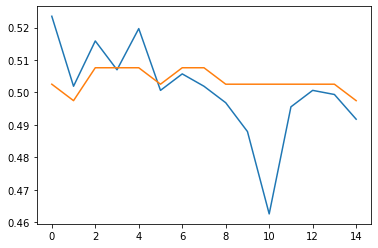

In [30]:
import matplotlib.pyplot as plt
plt.plot(acc)
plt.plot(valacc)

In [31]:
tr_pred = []
for i in nn.predict(xtrain):
    if(i>0.5):
        tr_pred.append(1)
    else:
        tr_pred.append(0)

ts_pred = []
for i in nn.predict(xtest):
    if(i>0.5):
        ts_pred.append(1)
    else:
        ts_pred.append(0)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print("Training accuracy",tr_acc)
print("Testing accuracy",ts_acc)

#generalization = 0.001902747050742
#generqaliztion = 0.00571469114222876

Training accuracy 0.5019059720457433
Testing accuracy 0.49746192893401014


## Conclusion:
- the generalization error = 0.001902747050742
- the ANN model does not gives a better accuracy on the balanced RUS dataset.
- Accuracy = 0.5057 [epoch 12]

## =========================================================================

### Implementing ANN on balanced dataset (Random Over Sampling)

In [32]:
import pandas as pd

In [33]:
B=pd.read_csv("C:/Users/Arnav/Desktop/PROJECTS/Credit card fraud detection (IBM)/new_set_ROS.csv")

In [34]:
B.head(3)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [35]:
B.shape

(568630, 32)

In [36]:
X= B.drop(labels=['Class'],axis=1)
Y=B[['Class']]
#full model - model with all the predictors

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=21)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

nn = Sequential()
nn.add(Dense(2000,input_dim=(31)))#Layer 1- input
nn.add(Dense(2000,activation="relu"))#Layer 2
nn.add(Dropout(0.2))#Hidden layer-1
nn.add(Dense(2000,activation="relu"))#Layer 3
nn.add(Dropout(0.3))#Hidden layer-2
nn.add(Dense(1,activation="sigmoid"))#Layer 4 

nn.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(xtrain,ytrain,validation_data=(xtest0,ytest),epochs=15)

Epoch 1/15
14216/14216 [==============================] - 897s 63ms/step - loss: 17.6747 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
14216/14216 [==============================] - 811s 57ms/step - loss: 3.0783 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/15
14216/14216 [==============================] - 583s 41ms/step - loss: 1.5923 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/15
14216/14216 [==============================] - 626s 44ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/15
14216/14216 [==============================] - 671s 47ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/15
14216/14216 [==============================] - 828s 58ms/step - loss: 1.9913 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/15
14216/14216 [==============================] - 2610s 184ms/step - loss: 0.6932 - accuracy: 0.5

In [40]:
acc = model.history["accuracy"]
valacc = model.history["val_accuracy"]

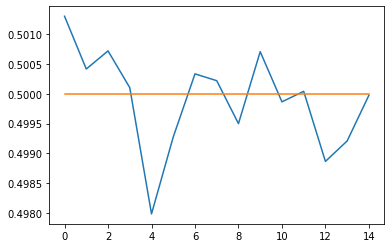

In [41]:
import matplotlib.pyplot as plt
plt.plot(acc)
plt.plot(valacc)

In [42]:
tr_pred = []
for i in nn.predict(xtrain):
    if(i>0.5):
        tr_pred.append(1)
    else:
        tr_pred.append(0)

ts_pred = []
for i in nn.predict(xtest):
    if(i>0.5):
        ts_pred.append(1)
    else:
        ts_pred.append(0)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print("Training accuracy",tr_acc)
print("Testing accuracy",ts_acc)

#generalization = 0.001902747050742
#generqaliztion = 0.00571469114222876

Training accuracy 0.5
Testing accuracy 0.5


## Conclusion:
- the generalization error = 0
- the ANN model does not gives a better accuracy on the balanced ROS dataset.
- Accuracy = 0.5007 [epoch 10]

### Final Conclusion: ANN model works best only on unbalanced credit card data